# Import Required Library

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os 

# Get the Path for Images

In [3]:
COVID_PATH = "Data/train/COVID19/"
NORMAL_PATH = "Data/train/NORMAL/"

**copy data from dataset in to train folder**

In [5]:
train_path = "Data/train/"
val_path = './COVID19-DATASET/val'
test_path = 'Data/test/'
#test_path= test_data

# Define Constants

In [6]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2 # We are aware of it.

In [7]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [8]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['COVID19', 'NORMAL', 'PNEUMONIA'] 
 and the length is : 3


# Load the Data / Images

## For Training dataset

In [9]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [10]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 5144 images belonging to 3 classes.


## For Test Dataset

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Import the images from the test dataset.

test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1288 images belonging to 3 classes.


In [13]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [14]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [15]:
### Sample... for adding Pooling (optional)
# global_average_layer = GlobalAveragePooling2D()

# prediction = Dense(NUM_CLASSES,activation='softmax')

In [16]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [17]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [18]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set)//BATCH_SIZE,
  validation_steps=len(test_set)//BATCH_SIZE
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 9s/step - accuracy: 0.9352 - loss: 0.1698 - val_accuracy: 0.9375 - val_loss: 0.1630
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.9208 - loss: 0.2147 - val_accuracy: 0.9375 - val_loss: 0.1255
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.9393 - loss: 0.1740 - val_accuracy: 1.0000 - val_loss: 0.0762
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.8990 - loss: 0.2270 - val_accuracy: 0.9375 - val_loss: 0.1792
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.9285 - loss: 0.1809 - val_accuracy: 0.9375 - val_loss: 0.1875
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.9291 - loss: 0.1854 - val_accuracy: 0.8750 - val_loss: 0.2679
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.9670 - loss: 0.1294 - val_accuracy: 0.8750 - val_loss: 0.4039
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.9292 - loss: 0.2099 - val_accuracy: 0.8438 - val_loss: 0.4872
Epoch 9/

In [21]:
model.save('my_model.h5')

# Evaluate the Model

In [22]:
val_path = 'Data/test/'

In [23]:
# Generate Validation set.
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1288 images belonging to 3 classes.


In [24]:
validation_steps = 200

loss0,accuracy0 = model.evaluate(validation_set, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

200/200 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.8266 - loss: 0.4052 
loss: 0.40
accuracy: 0.83


d:\Python\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [25]:
# Generate Validation set.
validation_set2 = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = 1,
    shuffle=False, 
    seed=42, 
    class_mode="binary"
)

# validation_set2.reset()

Found 1288 images belonging to 3 classes.


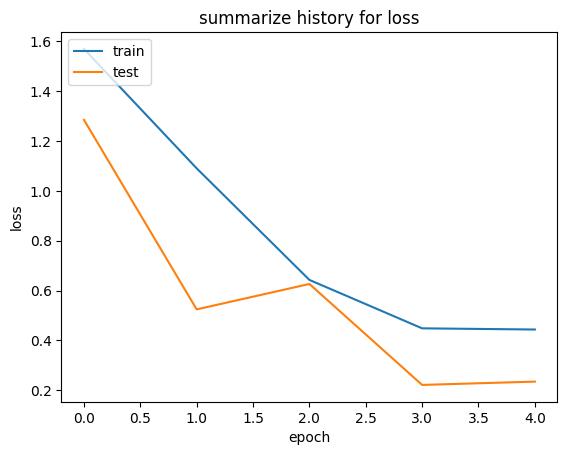

In [27]:
# summarize history for loss

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation (Test) loss')
plt.title('summarize history for loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

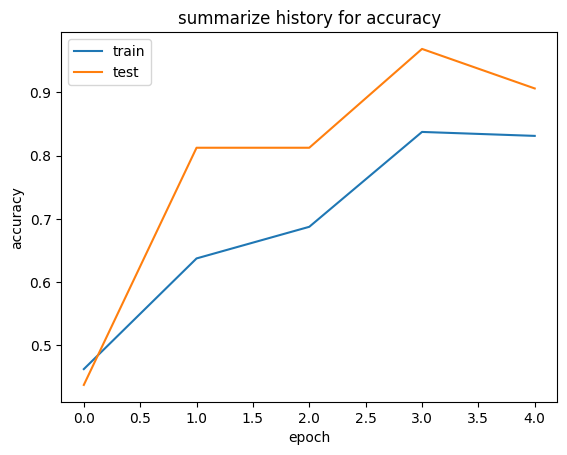

In [28]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predict

In [37]:
# get sample image to test.
img_normal = image.load_img("Data/test/NORMAL/NORMAL(1267).jpg", target_size = (224, 224))
img_pneumonia = image.load_img("Data/test/COVID19/COVID19(462).jpg", target_size = (224, 224))

In [38]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    if(result[0][0]<.50):
        result="normal"
    else:
        result="corona positive"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))
    
#     return result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


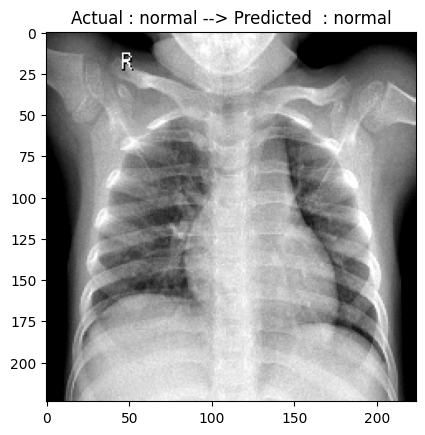

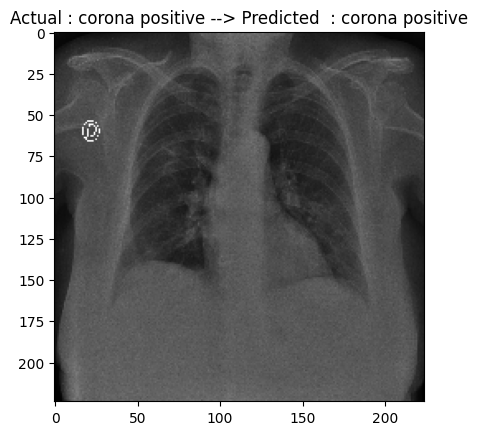

In [39]:
pred_normal = model_predict(img_normal, "normal")
pred_pneumonia = model_predict(img_pneumonia, "corona positive")